In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv("BNB-USD.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,10.356931,11.607489,10.325634,11.393217,11.393217,117838677
1,2019-03-02,11.384693,11.915753,10.960816,11.869744,11.869744,120807894
2,2019-03-03,11.845305,11.964979,11.352064,11.537903,11.537903,89868246
3,2019-03-04,11.538013,11.599405,11.070543,11.545945,11.545945,89421231
4,2019-03-05,11.520388,13.841443,11.520388,13.811967,13.811967,237026335
...,...,...,...,...,...,...,...
1915,2024-05-28,603.526428,604.985107,593.716187,601.213257,601.213257,1852329404
1916,2024-05-29,601.213257,602.931519,592.966614,594.972046,594.972046,1642696946
1917,2024-05-30,594.972534,601.665039,586.557678,595.026794,595.026794,1737524745
1918,2024-05-31,595.026794,598.423645,589.774841,593.522339,593.522339,1590349553


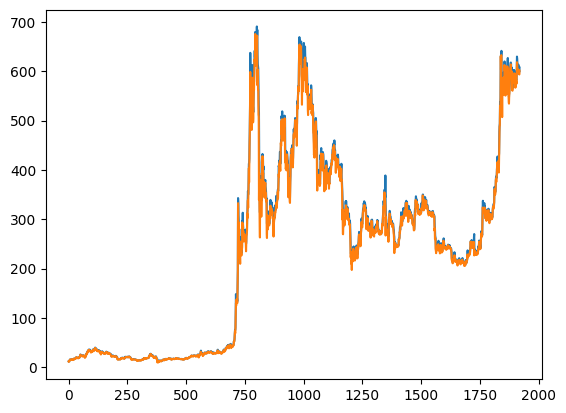

In [70]:
y = df[["Close"]]
X= df[["High"]]
plt.plot(X)
plt.plot(y)
plt.show()

<h1>Tỉ lệ Train Test 7:3

In [71]:
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [73]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1,1)

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import math

mape = mean_absolute_percentage_error(y_test, y_pred)*100
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAPE:", mape)
print("MSE: ", mse)
print("RMSE:", rmse)
print("R_Square: ", r2)

MAPE: 2.185697107023134
MSE:  76.77962563915294
RMSE: 8.7623983953683
R_Square:  0.9943551095163072


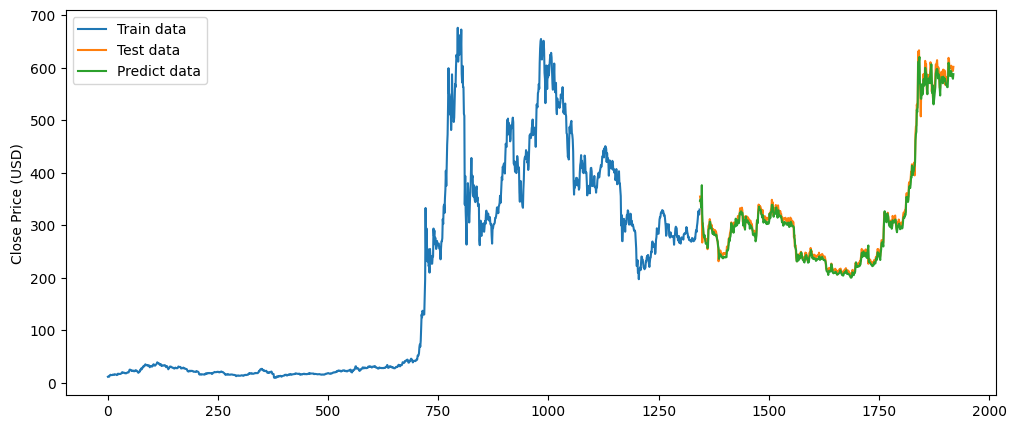

In [75]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

In [76]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[607.582886]])

In [77]:
x_next_30_day = []

for i in range(30):
    x_pred_next = model.predict(last_data)
    x_next_30_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

x_next_30_day

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

[array([[587.44127441]]),
 array([[567.98168902]]),
 array([[549.18103536]]),
 array([[531.017001]]),
 array([[513.46802901]]),
 array([[496.51329242]]),
 array([[480.13266951]]),
 array([[464.30671989]]),
 array([[449.01666147]]),
 array([[434.24434814]]),
 array([[419.97224825]]),
 array([[406.18342379]]),
 array([[392.86151031]]),
 array([[379.99069749]]),
 array([[367.55571034]]),
 array([[355.54179114]]),
 array([[343.93468188]]),
 array([[332.72060733]]),
 array([[321.88625875]]),
 array([[311.418778]]),
 array([[301.30574239]]),
 array([[291.53514984]]),
 array([[282.09540472]]),
 array([[272.975304]]),
 array([[264.16402403]]),
 array([[255.65110767]]),
 array([[247.42645186]]),
 array([[239.48029564]]),
 array([[231.8032086]]),
 array([[224.38607964]])]

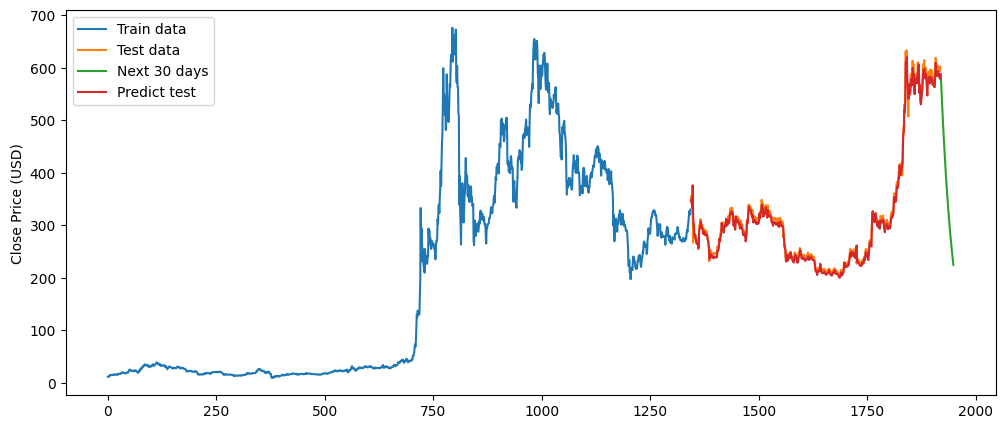

In [78]:
x_next_30_day = np.array(x_next_30_day).flatten()

plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+30),x_next_30_day, label='Next 30 days')
plt.plot(X_test.index, y_pred, label='Predict test')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

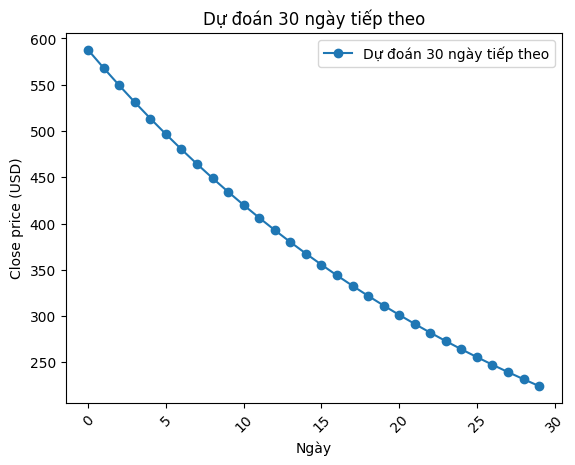

In [79]:
plt.plot(x_next_30_day, marker='o', label='Dự đoán 30 ngày tiếp theo')

plt.title('Dự đoán 30 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [80]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[607.582886]])

In [81]:
x_next_60_day = []

for i in range(60):
    x_pred_next = model.predict(last_data)
    x_next_60_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

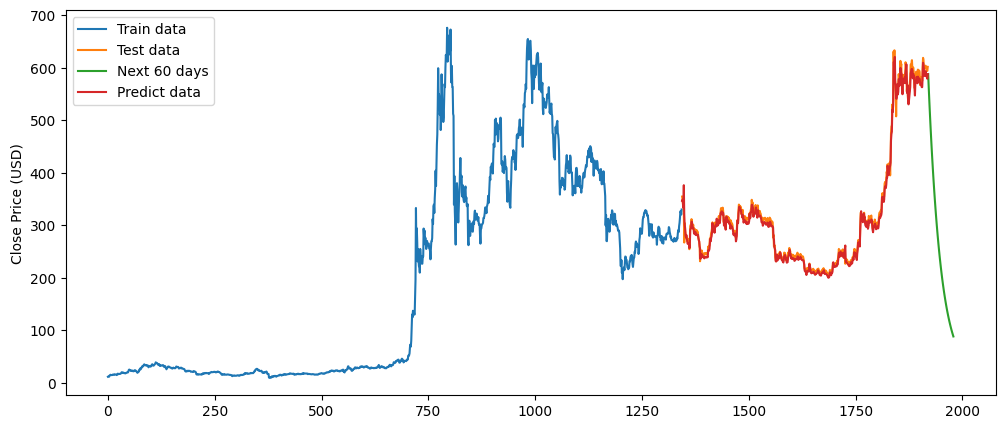

In [82]:
x_next_60_day = np.array(x_next_60_day).flatten()

plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+60),x_next_60_day, label='Next 60 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

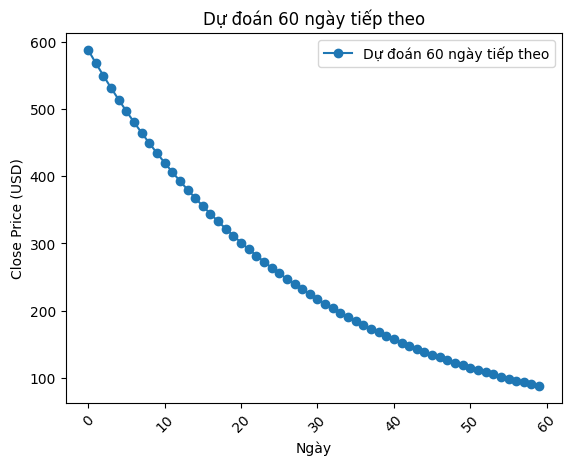

In [83]:
plt.plot(x_next_60_day, marker='o', label='Dự đoán 60 ngày tiếp theo')

plt.title('Dự đoán 60 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [84]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[607.582886]])

In [85]:
x_next_90_day = []

for i in range(90):
    x_pred_next = model.predict(last_data)
    x_next_90_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

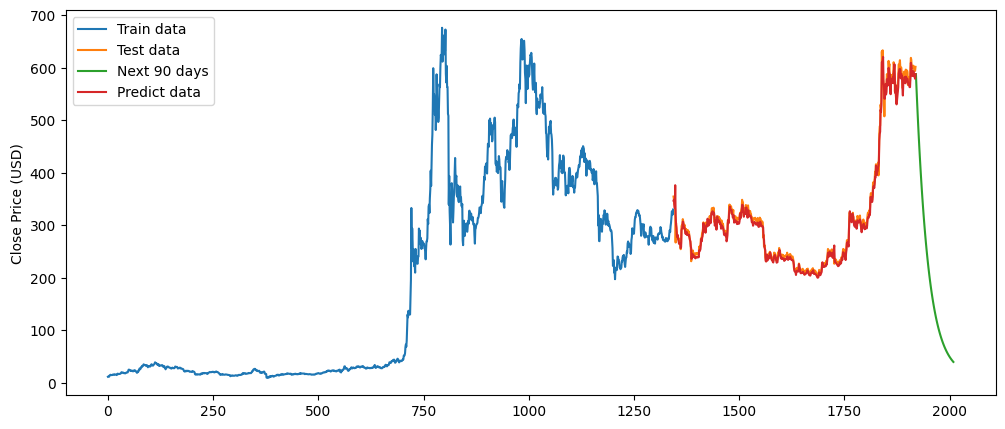

In [86]:
x_next_90_day = np.array(x_next_90_day).flatten()

plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+90),x_next_90_day, label='Next 90 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

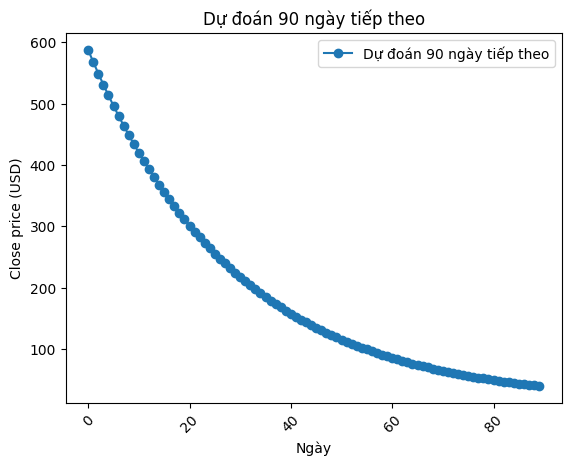

In [87]:
plt.plot(x_next_90_day, marker='o', label='Dự đoán 90 ngày tiếp theo')

plt.title('Dự đoán 90 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

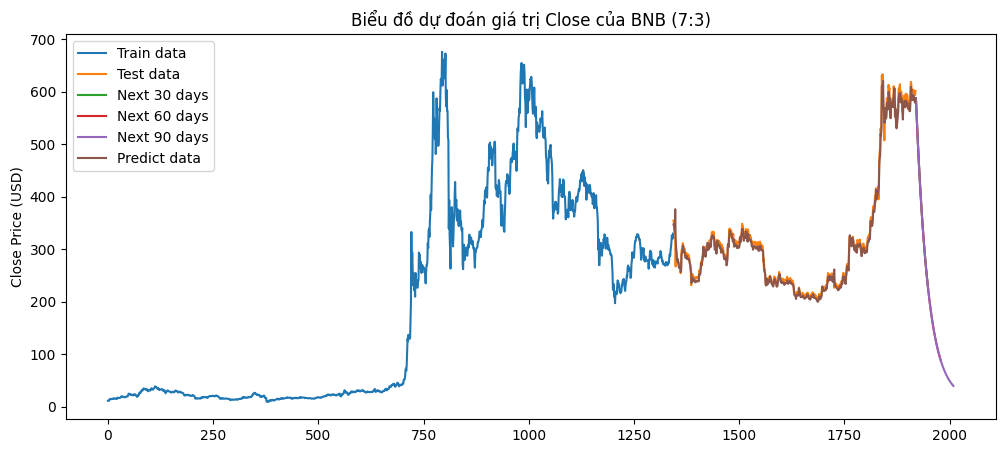

In [88]:
# bảng dự đoán chung

plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+30),x_next_30_day, label='Next 30 days')
plt.plot(range(len(df), len(df)+60),x_next_60_day, label='Next 60 days')
plt.plot(range(len(df), len(df)+90),x_next_90_day, label='Next 90 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.title('Biểu đồ dự đoán giá trị Close của BNB (7:3)')
plt.legend()
plt.show()

<h1>Tỉ lệ train test 8:2

In [89]:
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

model.fit(X_train, y_train)

LinearRegression()

In [90]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1,1)

In [91]:
mape = mean_absolute_percentage_error(y_test, y_pred)*100
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAPE:", mape)
print("MSE: ", mse)
print("RMSE:", rmse)
print("R_Square: ", r2)

MAPE: 2.0097709928900596
MSE:  70.55831856704556
RMSE: 8.399899914108833
R_Square:  0.9964092438858919


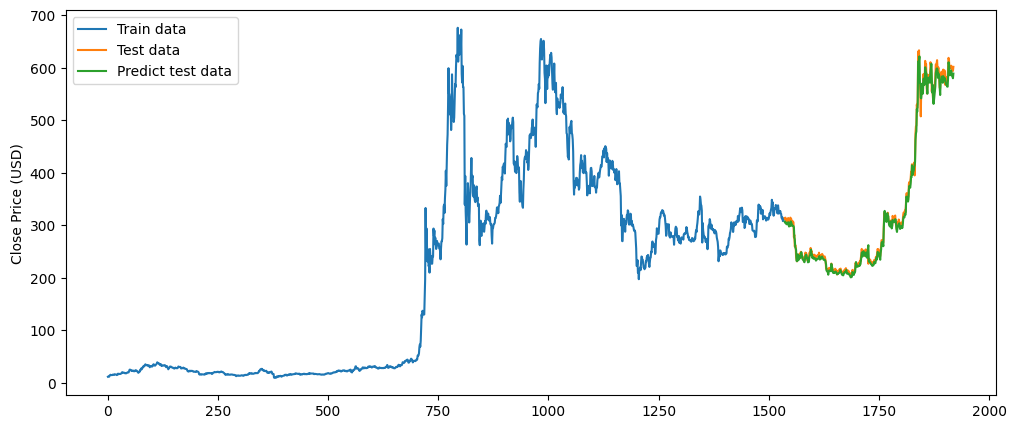

In [92]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(X_test.index, y_pred, label='Predict test data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

In [93]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[607.582886]])

In [94]:
x_next_30_day = []

for i in range(30):
    x_pred_next = model.predict(last_data)
    x_next_30_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

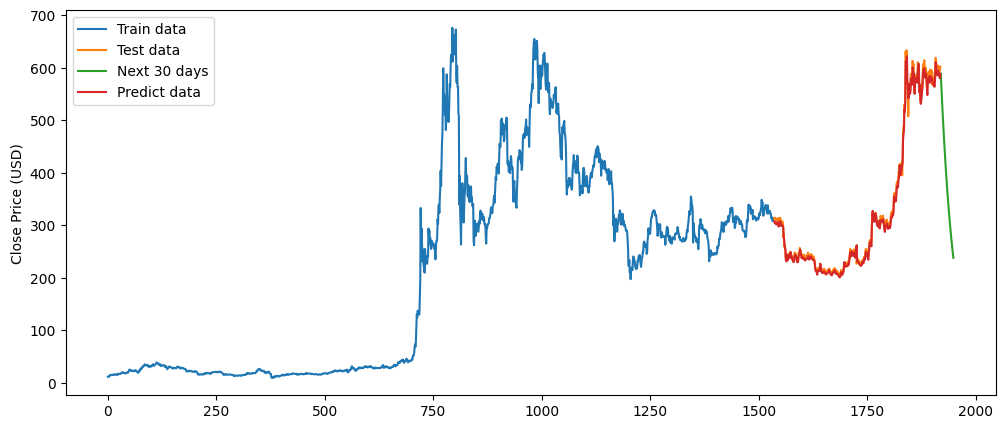

In [95]:
x_next_30_day = np.array(x_next_30_day).flatten()

plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+30),x_next_30_day, label='Next 30 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

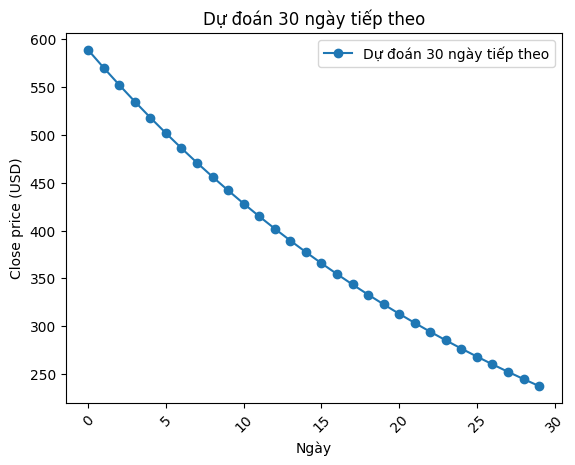

In [96]:
plt.plot(x_next_30_day, marker='o', label='Dự đoán 30 ngày tiếp theo')

plt.title('Dự đoán 30 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [97]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[607.582886]])

In [98]:
x_next_60_day = []

for i in range(60):
    x_pred_next = model.predict(last_data)
    x_next_60_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

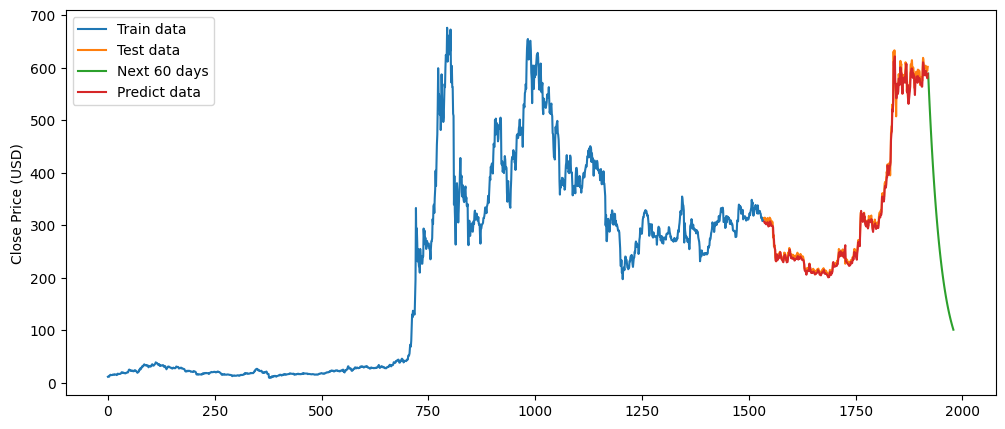

In [99]:
x_next_60_day = np.array(x_next_60_day).flatten()

plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+60),x_next_60_day, label='Next 60 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

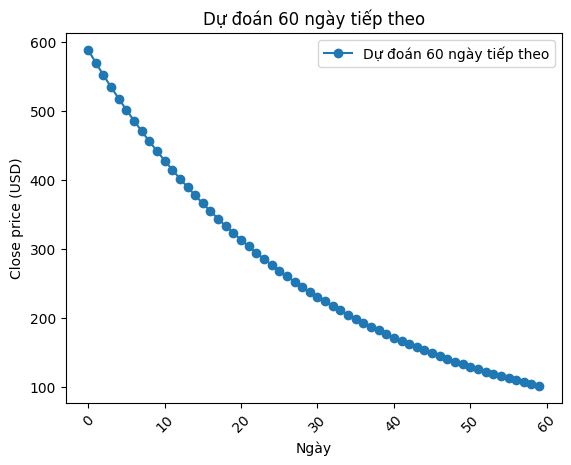

In [100]:
plt.plot(x_next_60_day, marker='o', label='Dự đoán 60 ngày tiếp theo')

plt.title('Dự đoán 60 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [101]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[607.582886]])

In [102]:
x_next_90_day = []

for i in range(90):
    x_pred_next = model.predict(last_data)
    x_next_90_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

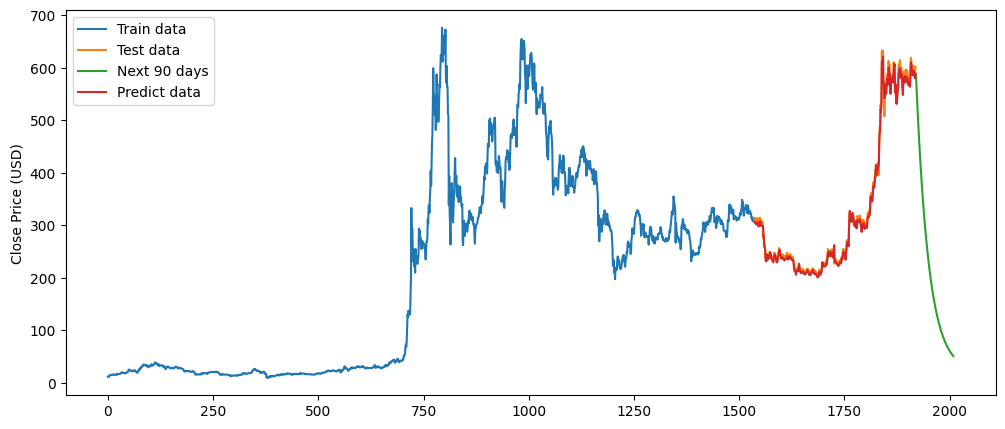

In [103]:
x_next_90_day = np.array(x_next_90_day).flatten()

plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+90),x_next_90_day, label='Next 90 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

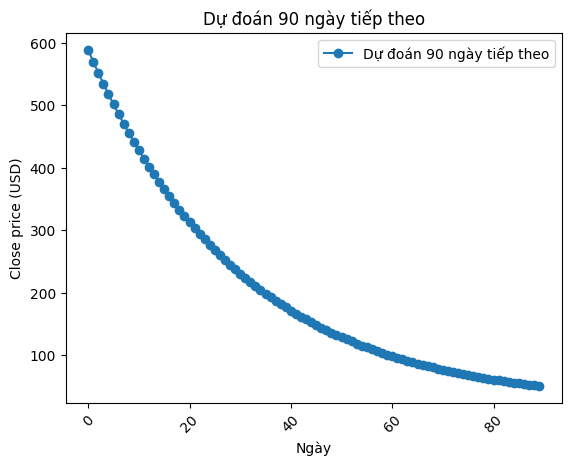

In [104]:
plt.plot(x_next_90_day, marker='o', label='Dự đoán 90 ngày tiếp theo')

plt.title('Dự đoán 90 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

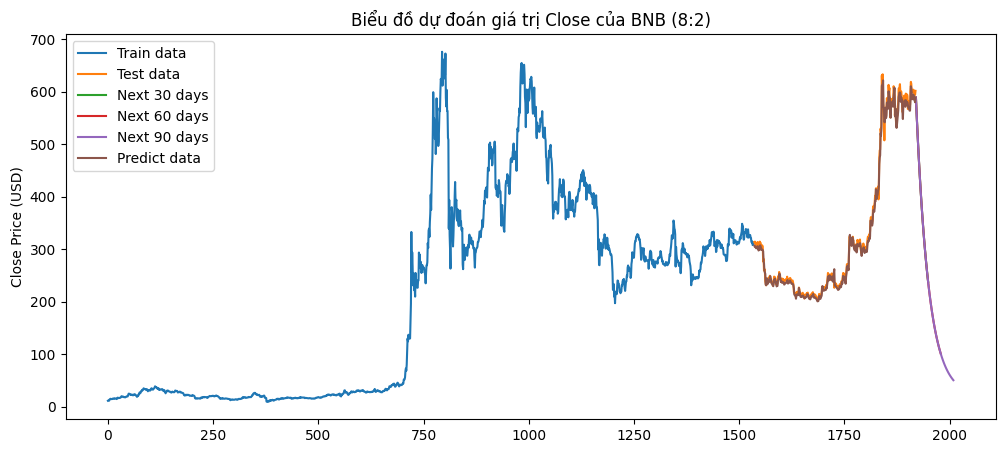

In [105]:
# biểu đồ dự đoán chung cho 30 60 90 ngày
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+30),x_next_30_day, label='Next 30 days')
plt.plot(range(len(df), len(df)+60),x_next_60_day, label='Next 60 days')
plt.plot(range(len(df), len(df)+90),x_next_90_day, label='Next 90 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.title('Biểu đồ dự đoán giá trị Close của BNB (8:2)')
plt.legend()
plt.show()

<h1>Tỉ lệ 9:1

In [106]:
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

model.fit(X_train, y_train)

LinearRegression()

In [107]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1,1)

In [108]:
mape = mean_absolute_percentage_error(y_test, y_pred)*100
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAPE:", mape)
print("MSE: ", mse)
print("RMSE:", rmse)
print("R_Square: ", r2)

MAPE: 1.8286107303811292
MSE:  99.71449194098601
RMSE: 9.985714393121105
R_Square:  0.9951512623978779


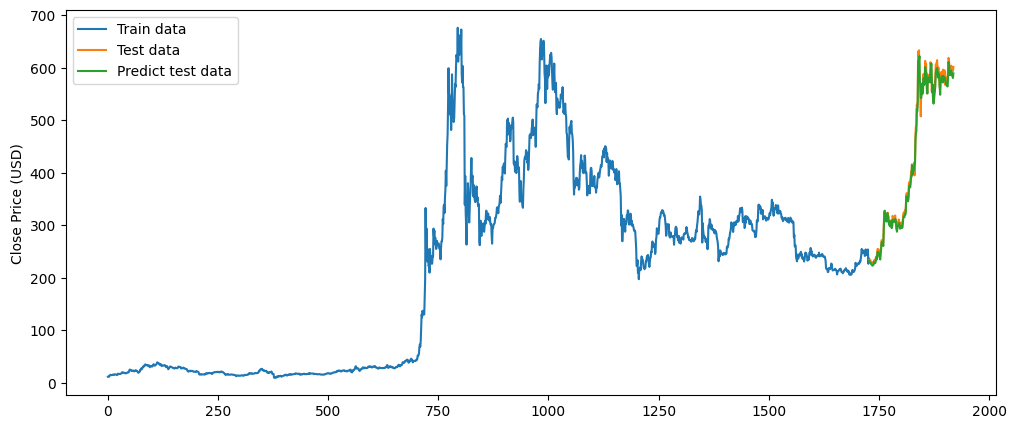

In [109]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(X_test.index, y_pred, label='Predict test data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

In [110]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[607.582886]])

In [111]:
x_next_30_day = []

for i in range(30):
    x_pred_next = model.predict(last_data)
    x_next_30_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

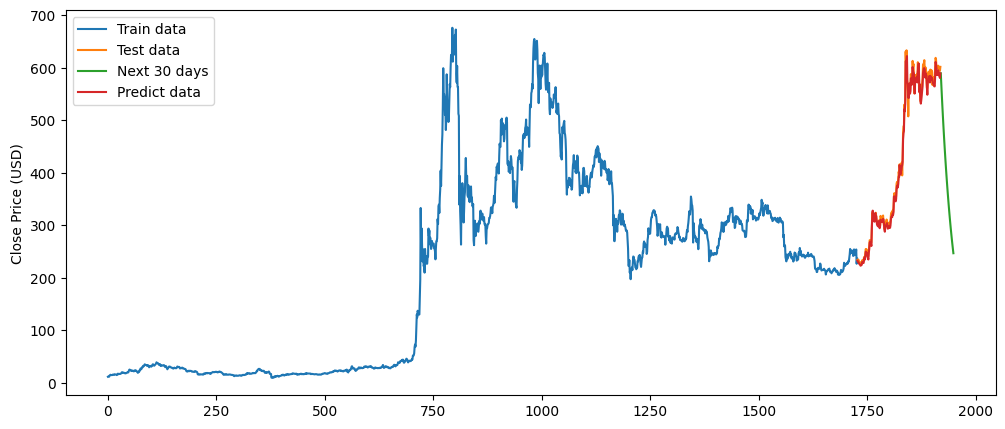

In [112]:
x_next_30_day = np.array(x_next_30_day).flatten()

plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+30), x_next_30_day, label='Next 30 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

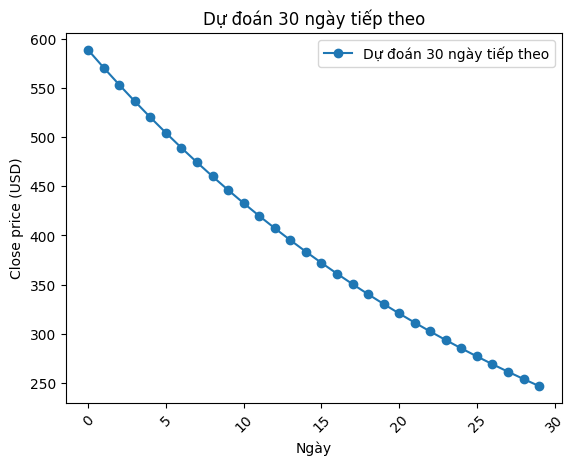

In [113]:
plt.plot(x_next_30_day, marker='o', label='Dự đoán 30 ngày tiếp theo')

plt.title('Dự đoán 30 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [114]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[607.582886]])

In [115]:
x_next_60_day = []

for i in range(60):
    x_pred_next = model.predict(last_data)
    x_next_60_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

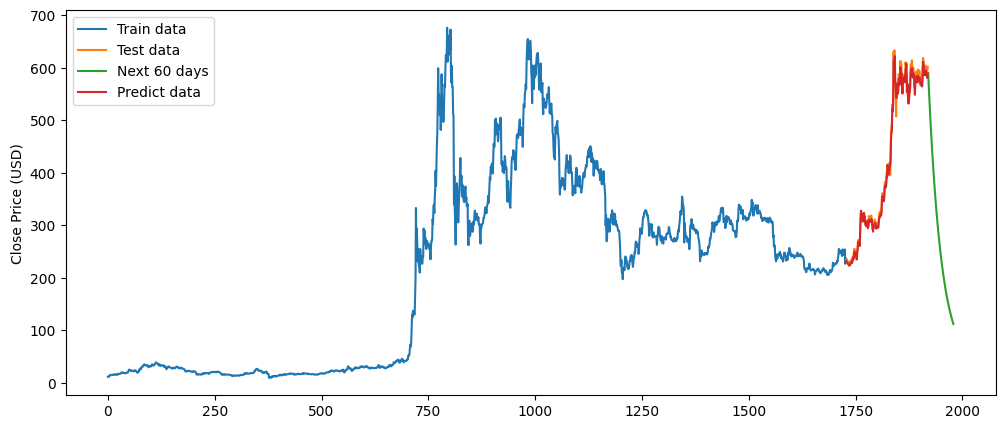

In [116]:
x_next_60_day = np.array(x_next_60_day).flatten()

plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+60),x_next_60_day, label='Next 60 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

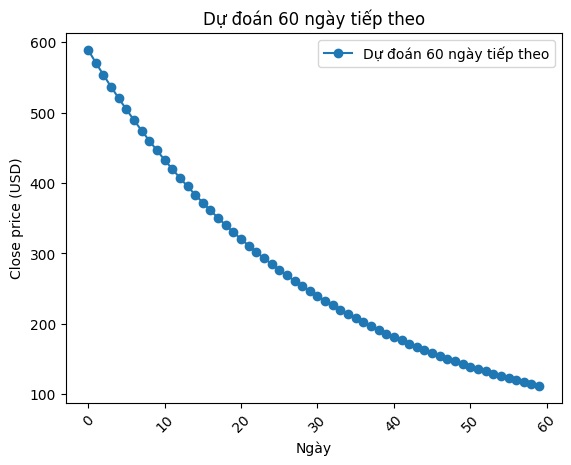

In [117]:
plt.plot(x_next_60_day, marker='o', label='Dự đoán 60 ngày tiếp theo')

plt.title('Dự đoán 60 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [118]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[607.582886]])

In [119]:
x_next_90_day = []

for i in range(90):
    x_pred_next = model.predict(last_data)
    x_next_90_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

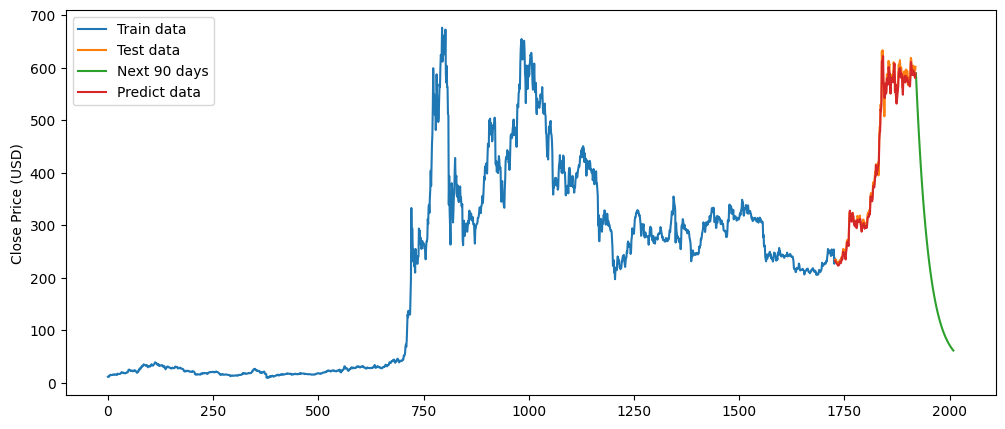

In [120]:
x_next_90_day = np.array(x_next_90_day).flatten()

plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+90),x_next_90_day, label='Next 90 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

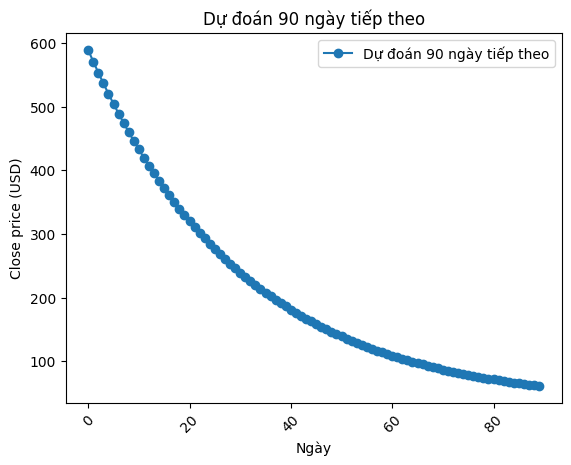

In [121]:
plt.plot(x_next_90_day, marker='o', label='Dự đoán 90 ngày tiếp theo')

plt.title('Dự đoán 90 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

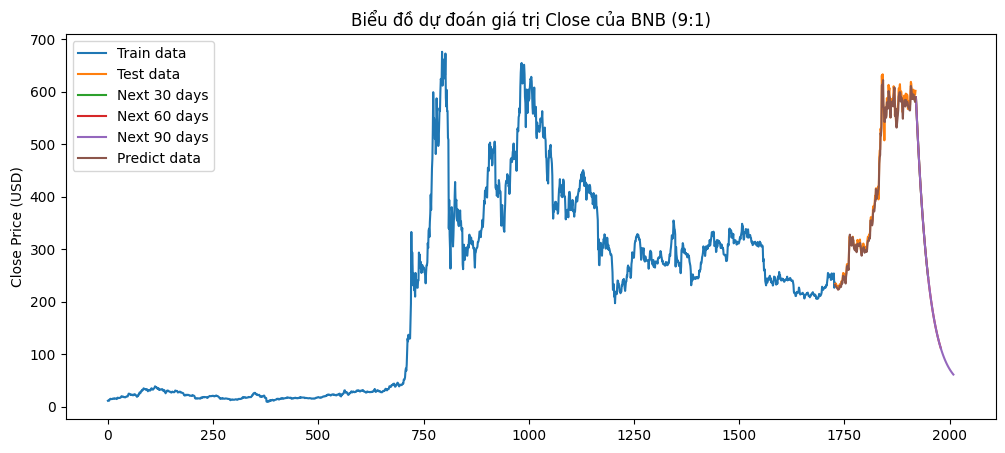

In [122]:
# Biểu đồ tổng thể dự đoán 30 60 90 ngày theo tỉ lệ 9:1

plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+30),x_next_30_day, label='Next 30 days')
plt.plot(range(len(df), len(df)+60),x_next_60_day, label='Next 60 days')
plt.plot(range(len(df), len(df)+90),x_next_90_day, label='Next 90 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.title('Biểu đồ dự đoán giá trị Close của BNB (9:1)')
plt.legend()
plt.show()